# D's Darling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import datetime

In [30]:
bid=pd.read_csv('all_bid.csv')
bid['bid_placed_on']=pd.to_datetime(bid['bid_placed_on'])

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
ds=bid[bid['buyer']=='ds darling deals']

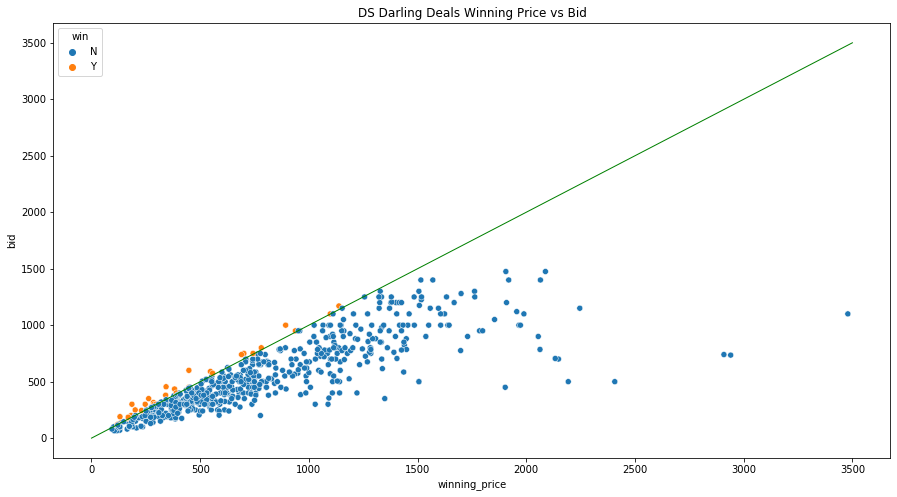

In [35]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='winning_price', y='bid', data=ds, hue='win')
plt.plot([3500, 0], [3500, 0], linewidth=1, color='green')
plt.title('DS Darling Deals Winning Price vs Bid')
plt.show()

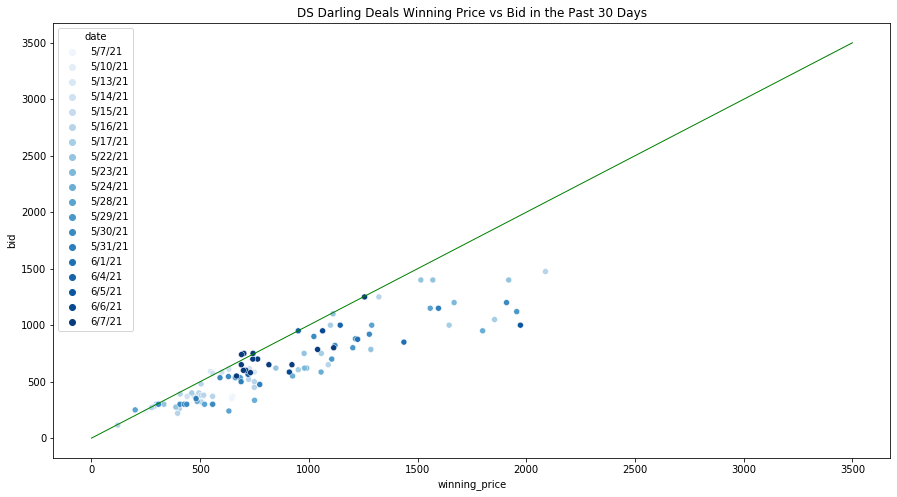

In [46]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='winning_price', y='bid', data=ds[ds['bid_placed_on']>datetime.datetime(2021,5,7)], hue='date',
               palette='Blues')
plt.plot([3500, 0], [3500, 0], linewidth=1, color='green')
plt.title('DS Darling Deals Winning Price vs Bid in the Past 30 Days')
plt.show()

In [18]:
top5=list(ds['brand_name'].value_counts().index[:5])

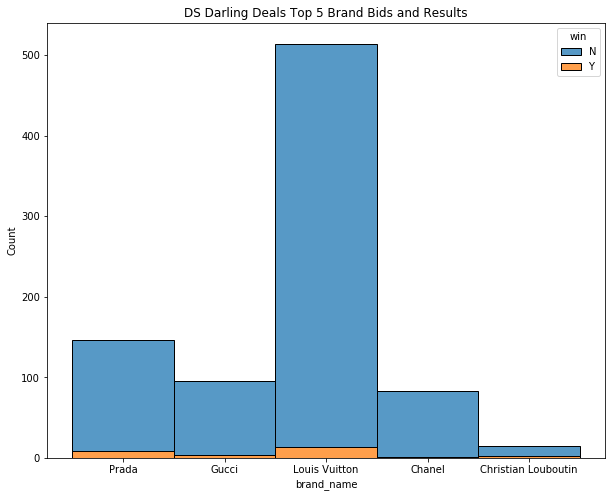

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(x='brand_name', data=ds[ds['brand_name'].isin(top5)], hue='win', multiple='stack')
plt.title('DS Darling Deals Top 5 Brand Bids and Results')
plt.show()

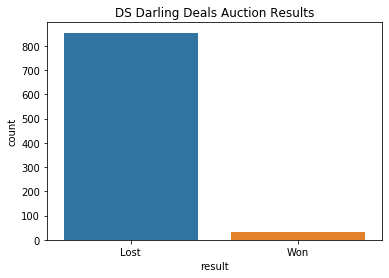

In [27]:
ax=sns.countplot(x=ds['win'])
plt.title('DS Darling Deals Auction Results')
ax.set_xticklabels(['Lost', 'Won'])
plt.xlabel('result')
plt.show()

In [51]:
ds['win'].value_counts()/ds['win'].count()*100

N    96.388262
Y     3.611738
Name: win, dtype: float64

In [54]:
ds[ds['win']=='N']['within_10'].value_counts()/ds[ds['win']=='N']['within_10'].count()*100

N    88.290398
Y    11.709602
Name: within_10, dtype: float64

In [59]:
ds[ds['brand_name'].isin(top5)].groupby('brand_name')['win'].value_counts()/ds[ds['brand_name'].isin(top5)].groupby('brand_name')['win'].count()*100

brand_name           win
Chanel               N      98.795181
                     Y       1.204819
Christian Louboutin  N      86.666667
                     Y      13.333333
Gucci                N      95.789474
                     Y       4.210526
Louis Vuitton        N      97.470817
                     Y       2.529183
Prada                N      94.520548
                     Y       5.479452
Name: win, dtype: float64

In [60]:
ds[ds['win']=='Y']

,auction_id,user_id,buyer,item_id,brand_name,category_name,title,overall_grade,bid,min_bid,winning_price,bid_placed_on,hour,day,date,auction_name,buyer_id,win,within_10
9244,267,216579.0,ds darling deals,2274198,Chanel,Sunglasses,３０４６８,C,135,67.62,135.0,2021-02-06 00:16:00,0,5,2/6/21,Aucnet Low,NaN,Y,Y
9258,267,216579.0,ds darling deals,2271356,Christian Louboutin,Shoulder Bags,Spike pochette bag blue / pink,B,350,67.62,263.0,2021-02-06 00:56:00,0,5,2/6/21,Aucnet Low,NaN,Y,Y
9260,267,216579.0,ds darling deals,2268380,Christian Louboutin,Shoulder Bags,Chain shoulder bag,C,170,67.62,169.0,2021-02-06 00:57:00,0,5,2/6/21,Aucnet Low,NaN,Y,Y
10697,269,216579.0,ds darling deals,2280105,Prada,Totes,Prada Prada Karelia Safiano tote bag leather 2...,B,455,96.60,343.0,2021-02-07 13:01:00,13,6,2/7/21,EcoRing,NaN,Y,Y
11805,270,216579.0,ds darling deals,2292170,Louis Vuitton,Handbags,Louis Vuitton Mirror Alma BB M52498 SN4188,B,1000,476.82,893.0,2021-02-11 15:43:00,15,3,2/11/21,Val Bags & Jewelry,NaN,Y,Y
11808,270,216579.0,ds darling deals,2292731,Louis Vuitton,Crossbody Bags,Louis Vuitton Empreinte Pochette Felice M64064...,AB,950,391.00,938.0,2021-02-11 15:44:00,15,3,2/11/21,Val Bags & Jewelry,NaN,Y,Y
11821,270,216579.0,ds darling deals,2291972,Prada,Handbags,Prada Saffiano Lux Hand bag Beige 1BA274,B,451,362.39,448.0,2021-02-11 15:52:00,15,3,2/11/21,Val Bags & Jewelry,NaN,Y,Y
11824,270,216579.0,ds darling deals,2292487,Prada,Handbags,Prada Saffiano Lux Leather Hand bag Grey BN1802,B,435,305.17,382.0,2021-02-11 15:53:00,15,3,2/11/21,Val Bags & Jewelry,NaN,Y,Y
13254,272,216579.0,ds darling deals,2302720,Ferragamo,Shoulder Bags,Ferragamo Calf Leather Shoulder Bag,C,195,68.08,187.0,2021-02-14 02:37:00,2,6,2/14/21,Aucnet Low,NaN,Y,Y
13255,272,216579.0,ds darling deals,2302164,Ferragamo,Shoulder Bags,Ferragamo Vala Shoulder Bag,C,190,72.94,131.0,2021-02-14 02:37:00,2,6,2/14/21,Aucnet Low,NaN,Y,Y
